In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingRegressor  
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("DRUGS SIDE EFFECTS.csv")
data.head(10)

,NAME,GENDER,DRUG NAME,AGE,RACE,SIDE EFFECTS
0,Aaban,M,topamax,41.0,White,Mild Side Effects
1,Aaban,M,zocor,53.0,"Hispanic, White",Extremely Severe Side Effects
2,Aabha,F,tazorac,31.0,White,Mild Side Effects
3,Aabha,F,voltaren,44.0,White,Severe Side Effects
4,Aabid,M,tramadol,24.0,White,No Side Effects
5,Aabida,F,valtrex,55.0,"Hispanic, White",No Side Effects
6,Aabidah,F,levoxyl,34.0,White,No Side Effects
7,Aabigail,F,imitrex,28.0,White,Moderate Side Effects
8,Aabir,M,seroquel,38.0,White,Mild Side Effects
9,Aabir,M,minocycline,56.0,White,No Side Effects


In [3]:
# check for rows with all the features having the same values
same_values_rows = data[data.duplicated(keep=False) & data.apply(lambda x: x.nunique() ==1, axis=1)]

# Print the rows with all the features having the same values
print("Rows with the same values in all features:")
print(same_values_rows)

Rows with the same values in all features:
Empty DataFrame
Columns: [NAME, GENDER, DRUG NAME, AGE, RACE, SIDE EFFECTS]
Index: []


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   NAME          400000 non-null  object 
 1   GENDER        400000 non-null  object 
 2   DRUG NAME     400000 non-null  object 
 3   AGE           399980 non-null  float64
 4   RACE          400000 non-null  object 
 5   SIDE EFFECTS  400000 non-null  object 
dtypes: float64(1), object(5)
memory usage: 18.3+ MB


In [5]:
data.shape

(400000, 6)

In [6]:
data.describe()

,AGE
count,399980.000000
mean,41.454180
std,12.341896
min,14.000000
25%,31.000000
50%,41.000000
75%,51.000000
max,90.000000


In [7]:
data.isna().sum()

NAME             0
GENDER           0
DRUG NAME        0
AGE             20
RACE             0
SIDE EFFECTS     0
dtype: int64

In [8]:
data.nunique()

NAME            133911
GENDER               2
DRUG NAME          502
AGE                 67
RACE                 9
SIDE EFFECTS         5
dtype: int64

<Axes: ylabel='count'>

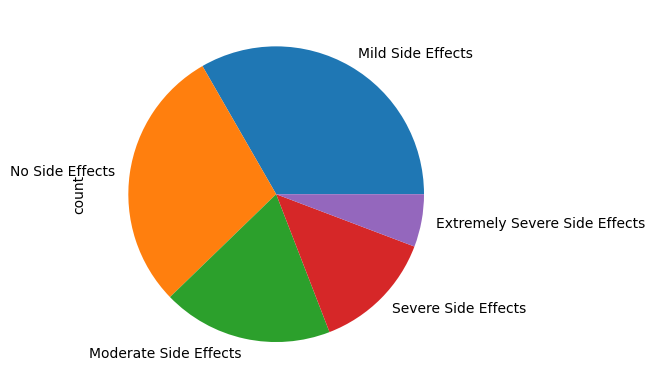

In [9]:
data['SIDE EFFECTS'].value_counts().plot(kind = 'pie')

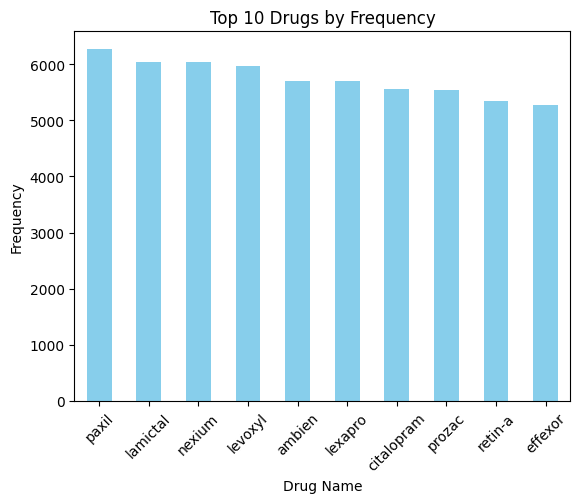

In [10]:
# Example: Count occurrences of each drug
drug_counts = data['DRUG NAME'].value_counts()

# Plotting the top 10 drugs (for clarity)
drug_counts.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Drugs by Frequency')
plt.xlabel('Drug Name')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

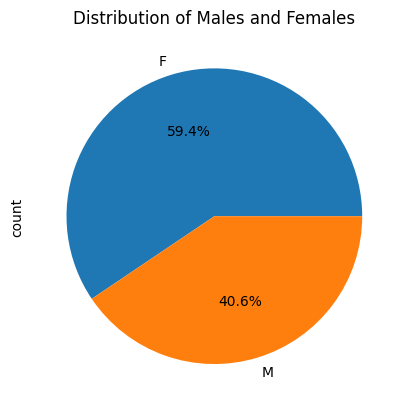

In [11]:
data["GENDER"].value_counts().plot(kind = "pie", autopct = "%1.1f%%")
plt.title("Distribution of Males and Females")
plt.show()

<Figure size 1000x600 with 0 Axes>

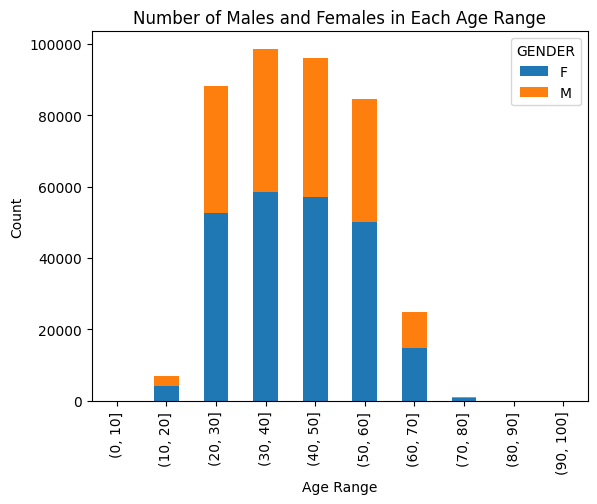

In [12]:
age_ranges = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

# categorize the ages into the defined ranges
data["Age Range"] = pd.cut(data["AGE"], bins=age_ranges)

# Group the data by age range and gender, and count the number of occurances
grouped_data = data.groupby(["Age Range", "GENDER"]).size().unstack()

# Set the figure size
plt.figure(figsize=(10,6))

# Create a stacked bar plot
ax = grouped_data.plot(kind='bar', stacked=True)

# Add labels and title
plt.xlabel("Age Range")
plt.ylabel("Count")
plt.title("Number of Males and Females in Each Age Range")

plt.show()

In [13]:
data["Age Range"]= pd.cut(data['AGE'], bins=age_ranges).astype(str)

# Group the data by age range and gender and count the number of occurences

grouped_data = data.groupby(["Age Range", "GENDER"]).size().unstack()

# Create a stacked bar plot using plotly
fig= go.Figure()

# Add bars for males and females in each age range
for col in grouped_data.columns:
    fig.add_trace(go.Bar(x =grouped_data.index, y=grouped_data[col], name=col,
                         text=grouped_data[col], textposition="auto"))
                         
# Update the layout of the figure

fig.update_layout(barmode="stack", xaxis_title = "Age Range", yaxis_title="count",
                  title = "Number of Males and Females in Each Age Range")

fig.show()